# Introduction
Dans un premier temps, nous allons visualiser la consommation électrique de la région ile de france et les températures de cette région.
## Données de consommation d'énergie

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


# Charger les données de consommation énergétique régionale
file_path = '/Users/eliotmorard/Documents/Lyx/211/Data/consommation-quotidienne-brute-regionale.csv'
regional_data = pd.read_csv(file_path, delimiter=';')

# Afficher les premières lignes du DataFrame pour comprendre sa structure
print(regional_data.head())

                Date - Heure        Date  Heure  Code INSEE région  \
0  2013-01-03T00:00:00+01:00  2013-01-03  00:00                 32   
1  2013-01-03T00:00:00+01:00  2013-01-03  00:00                 44   
2  2013-01-03T00:00:00+01:00  2013-01-03  00:00                 75   
3  2013-01-03T00:30:00+01:00  2013-01-03  00:30                 11   
4  2013-01-03T00:30:00+01:00  2013-01-03  00:30                 53   

               Région  Consommation brute gaz (MW PCS 0°C) - GRTgaz  \
0     Hauts-de-France                                        8481.0   
1           Grand Est                                        8645.0   
2  Nouvelle-Aquitaine                                        2553.0   
3       Île-de-France                                           NaN   
4            Bretagne                                           NaN   

  Statut - GRTgaz  Consommation brute gaz (MW PCS 0°C) - Teréga  \
0       Définitif                                           NaN   
1       Définitif 

**On va seulement sélectionner l'ile de france grâce à la colonne "Code INSEE région" = 11**

In [2]:
# Filtrer les données pour la région Île-de-France
idf_data = regional_data[regional_data['Code INSEE région'] == 11].copy()

# Convertir la colonne 'Date' en format datetime
idf_data['Date'] = pd.to_datetime(idf_data['Date'], format='%Y/%m/%d')

print(idf_data)

                      Date - Heure       Date  Heure  Code INSEE région  \
3        2013-01-03T00:30:00+01:00 2013-01-03  00:30                 11   
8        2013-01-03T02:00:00+01:00 2013-01-03  02:00                 11   
21       2013-01-03T04:00:00+01:00 2013-01-03  04:00                 11   
27       2013-01-03T04:30:00+01:00 2013-01-03  04:30                 11   
36       2013-01-03T06:00:00+01:00 2013-01-03  06:00                 11   
...                            ...        ...    ...                ...   
2348287  2023-10-25T04:00:00+02:00 2023-10-25  04:00                 11   
2348291  2023-10-25T04:30:00+02:00 2023-10-25  04:30                 11   
2348296  2023-10-25T06:00:00+02:00 2023-10-25  06:00                 11   
2348318  2023-10-25T11:30:00+02:00 2023-10-25  11:30                 11   
2348337  2023-10-25T14:30:00+02:00 2023-10-25  14:30                 11   

                Région  Consommation brute gaz (MW PCS 0°C) - GRTgaz  \
3        Île-de-France     

In [3]:
# Supprimer les colonnes inutiles
colonnes_a_supprimer = ['Date - Heure', 
                        'Région','Consommation brute gaz (MW PCS 0°C) - GRTgaz', 
                        'Statut - GRTgaz', 
                        'Consommation brute gaz (MW PCS 0°C) - Teréga', 
                        'Statut - Teréga', 
                        'Consommation brute gaz totale (MW PCS 0°C)', 
                        'Statut - RTE', 
                        'Consommation brute totale (MW)']  
idf_data.drop(columns=colonnes_a_supprimer, inplace=True)

**On va agréger les valeurs par consommation journalières et hebdomadaires**

In [4]:
# Agréger les données par jour pour obtenir la consommation totale quotidienne
daily_idf_consumption = idf_data.groupby(idf_data['Date'].dt.date).sum(numeric_only=True).copy()
daily_idf_consumption.index = pd.to_datetime(daily_idf_consumption.index)

In [5]:
# Resampler les données pour obtenir des sommes hebdomadaires puis calculer la moyenne pour chaque semaine
weekly_idf_consumption = daily_idf_consumption.resample('W').sum().copy()

In [6]:
# Renommer les colonnes pour une meilleur lisibilité
daily_idf_consumption.rename(columns={'Consommation brute électricité (MW) - RTE': 'conso_j'}, inplace=True)
weekly_idf_consumption.rename(columns={'Consommation brute électricité (MW) - RTE': 'conso_h'}, inplace=True)

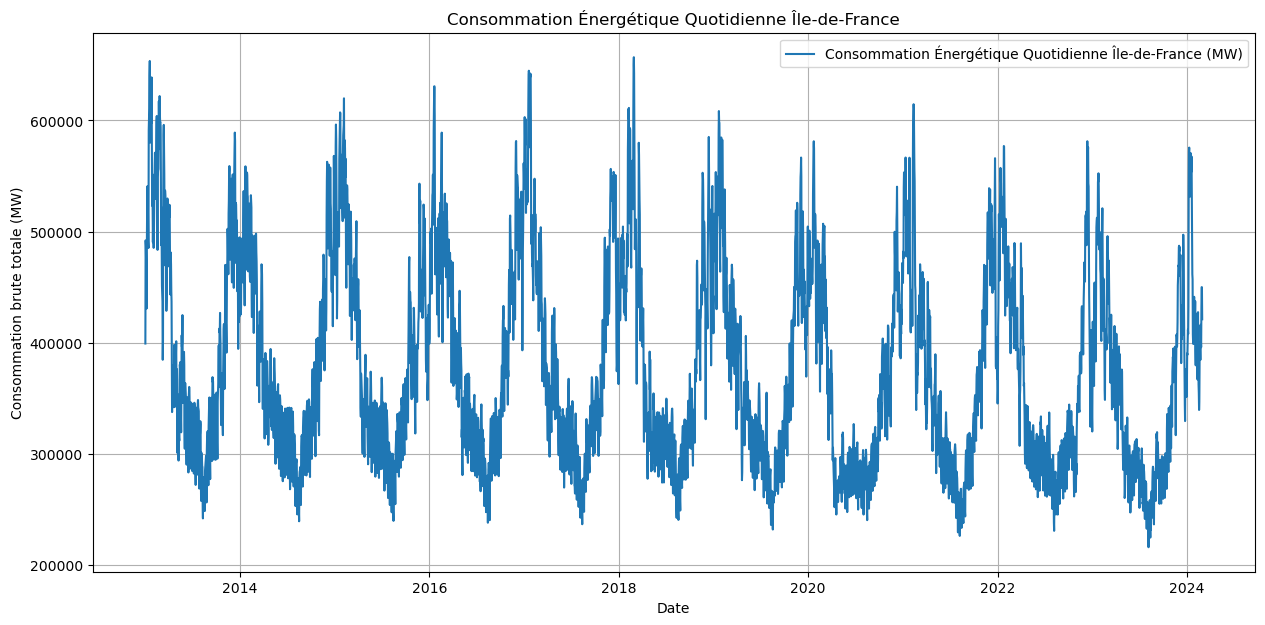

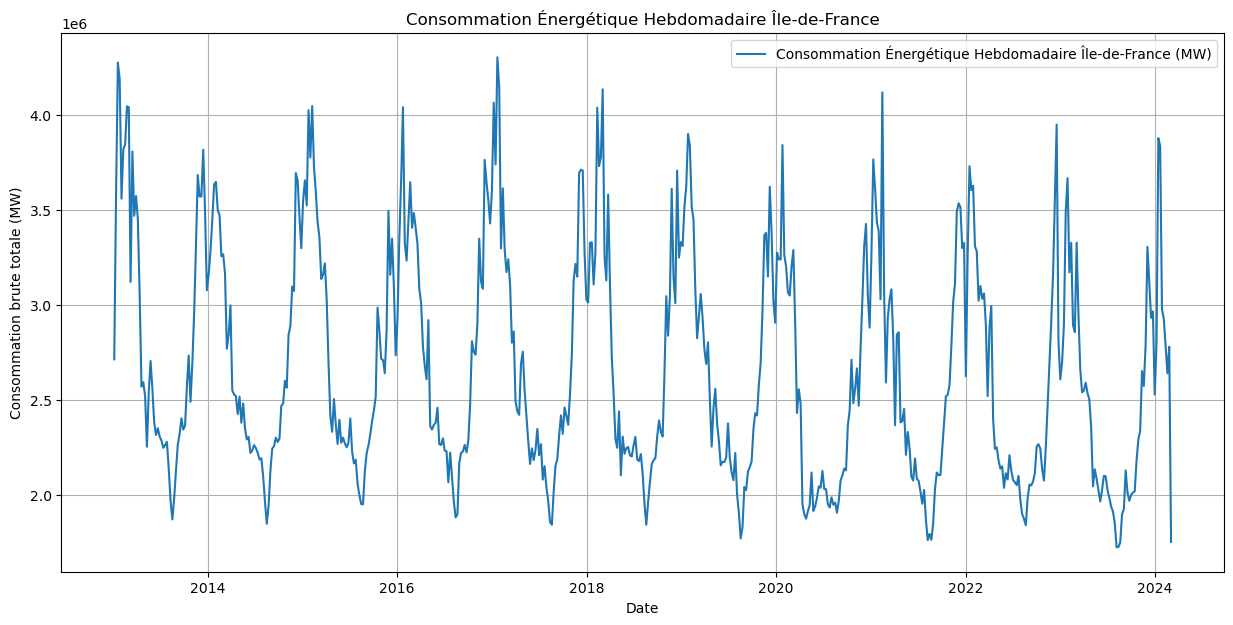

In [7]:
# Visualiser les données de consommation énergétique pour Île-de-France
plt.figure(figsize=(15, 7))
plt.plot(daily_idf_consumption.index, daily_idf_consumption['conso_j'], label='Consommation Énergétique Quotidienne Île-de-France (MW)')
plt.xlabel('Date')
plt.ylabel('Consommation brute totale (MW)')
plt.title('Consommation Énergétique Quotidienne Île-de-France')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(15, 7))
plt.plot(weekly_idf_consumption.index, weekly_idf_consumption['conso_h'], label='Consommation Énergétique Hebdomadaire Île-de-France (MW)')
plt.xlabel('Date')
plt.ylabel('Consommation brute totale (MW)')
plt.title('Consommation Énergétique Hebdomadaire Île-de-France')
plt.legend()
plt.grid(True)
plt.show()

 ## Données de température en IDF

In [8]:
# Charger les données de consommation énergétique régionale
file_path = '/Users/eliotmorard/Documents/Lyx/211/Data/temperature-quotidienne-regionale.csv'
regional_temp = pd.read_csv(file_path, delimiter=';')

# Afficher les premières lignes du DataFrame pour comprendre sa structure
print(regional_temp.head())

                       id        date  code_insee_region  \
0  2018-01-01T00:00:00-11  2018-01-01                 11   
1  2018-01-01T00:00:00-28  2018-01-01                 28   
2  2018-01-01T00:00:00-24  2018-01-01                 24   
3  2018-01-02T00:00:00-11  2018-01-02                 11   
4  2018-01-02T00:00:00-84  2018-01-02                 84   

                 region  tmin   tmax  tmoy  
0         Île-de-France  5.96   9.28  7.62  
1             Normandie  5.00   8.98  6.99  
2   Centre-Val de Loire  5.25   9.68  7.47  
3         Île-de-France  5.32  13.60  9.46  
4  Auvergne-Rhône-Alpes  3.02  11.56  7.29  


**On va seulement sélectionner l'ile de france grâce à la colonne "code_insee_region" = 11**

In [9]:
# Filtrer les données pour la région Île-de-France
idf_temp = regional_temp[regional_temp['code_insee_region'] == 11].copy()

# Convertir la colonne 'Date' en format datetime
idf_temp['date'] = pd.to_datetime(idf_temp['date'], format='%Y/%m/%d')

print(idf_temp)

                           id       date  code_insee_region         region  \
0      2018-01-01T00:00:00-11 2018-01-01                 11  Île-de-France   
3      2018-01-02T00:00:00-11 2018-01-02                 11  Île-de-France   
19     2018-01-14T00:00:00-11 2018-01-14                 11  Île-de-France   
21     2018-01-15T00:00:00-11 2018-01-15                 11  Île-de-France   
22     2018-01-17T00:00:00-11 2018-01-17                 11  Île-de-France   
...                       ...        ...                ...            ...   
39415  2024-04-18T00:00:00-11 2024-04-18                 11  Île-de-France   
39418  2024-04-19T00:00:00-11 2024-04-19                 11  Île-de-France   
39424  2024-04-21T00:00:00-11 2024-04-21                 11  Île-de-France   
39429  2024-04-23T00:00:00-11 2024-04-23                 11  Île-de-France   
39432  2024-04-24T00:00:00-11 2024-04-24                 11  Île-de-France   

       tmin   tmax  tmoy  
0      5.96   9.28  7.62  
3      5.

In [10]:
# Supprimer les colonnes inutiles
colonnes_a_supprimer_temp = ['id', 
                            'region']  
idf_temp.drop(columns=colonnes_a_supprimer_temp, inplace=True)

In [11]:
# Agréger les données par jour pour obtenir la température
daily_idf_temp = idf_temp.groupby(idf_temp['date'].dt.date).sum(numeric_only=True).copy()
daily_idf_temp.index = pd.to_datetime(daily_idf_temp.index)

In [12]:
daily_idf_temp

,code_insee_region,tmin,tmax,tmoy
date,,,,
2016-01-01,11,3.30,8.76,6.03
2016-01-02,11,6.60,10.86,8.73
2016-01-03,11,5.30,8.08,6.69
2016-01-04,11,5.46,9.76,7.61
2016-01-05,11,5.12,9.00,7.06
...,...,...,...,...
2024-04-25,11,2.24,14.08,8.16
2024-04-26,11,4.92,16.32,10.62
2024-04-27,11,9.06,15.88,12.47


In [13]:
# Resampler les données pour obtenir des moyennes hebdomadaires
weekly_idf_temp = daily_idf_temp.resample('W').mean().copy()

In [14]:
weekly_idf_temp

,code_insee_region,tmin,tmax,tmoy
date,,,,
2016-01-03,11.0,5.066667,9.233333,7.150000
2016-01-10,11.0,4.731429,9.634286,7.182857
2016-01-17,11.0,1.880000,6.580000,4.230000
2016-01-24,11.0,-1.137143,4.277143,1.570000
2016-01-31,11.0,5.665714,11.262857,8.464286
...,...,...,...,...
2024-04-07,11.0,10.688571,18.094286,14.391429
2024-04-14,11.0,9.120000,20.168571,14.644286
2024-04-21,11.0,4.965714,12.574286,8.770000


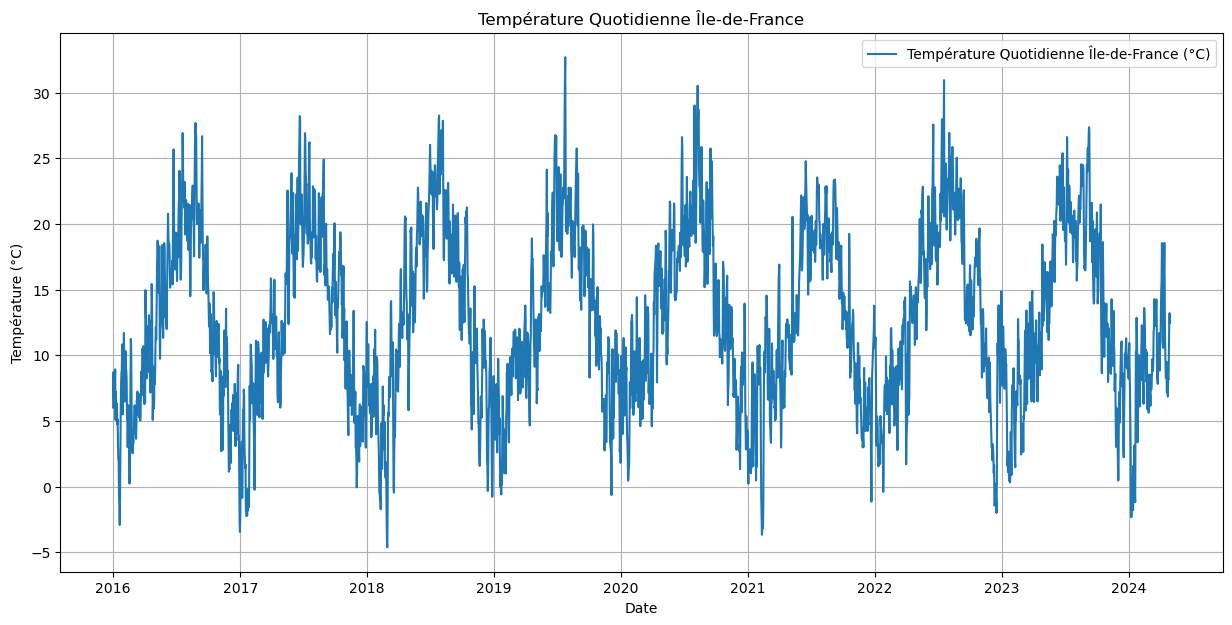

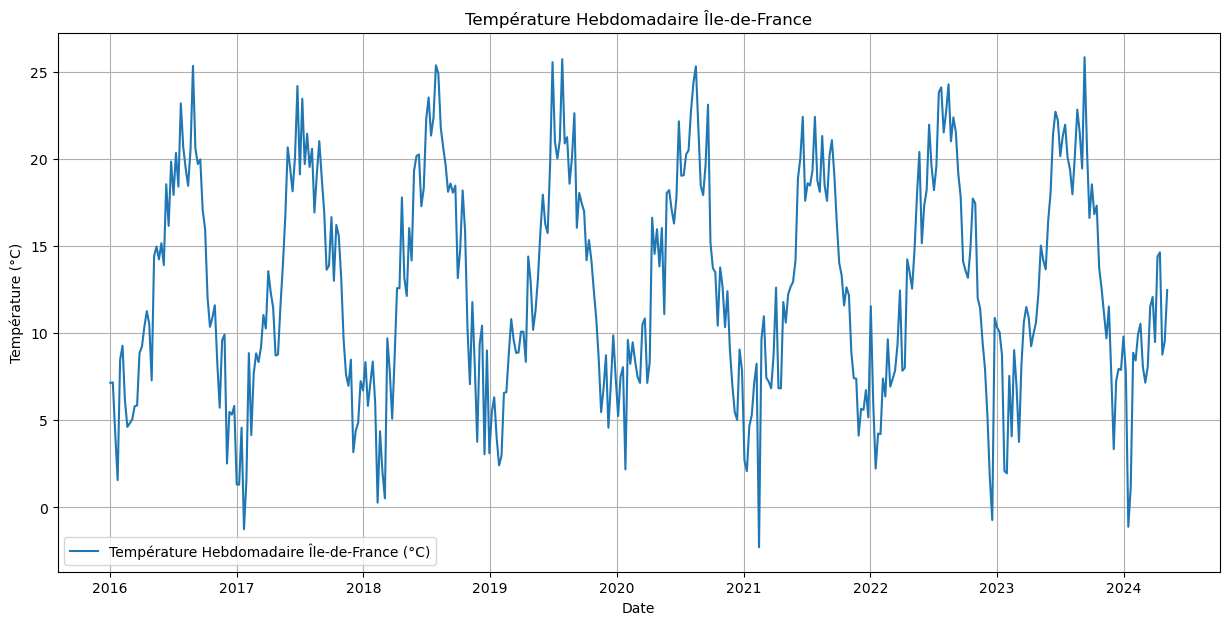

In [15]:
# Visualiser les données de température pour Île-de-France
plt.figure(figsize=(15, 7))
plt.plot(daily_idf_temp.index, daily_idf_temp['tmoy'], label='Température Quotidienne Île-de-France (°C)')
plt.xlabel('Date')
plt.ylabel('Température (°C)')
plt.title('Température Quotidienne Île-de-France')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(15, 7))
plt.plot(weekly_idf_temp.index, weekly_idf_temp['tmoy'], label='Température Hebdomadaire Île-de-France (°C)')
plt.xlabel('Date')
plt.ylabel('Température (°C)')
plt.title('Température Hebdomadaire Île-de-France')
plt.legend()
plt.grid(True)
plt.show()

## Corrélation entre température et consommation électrique

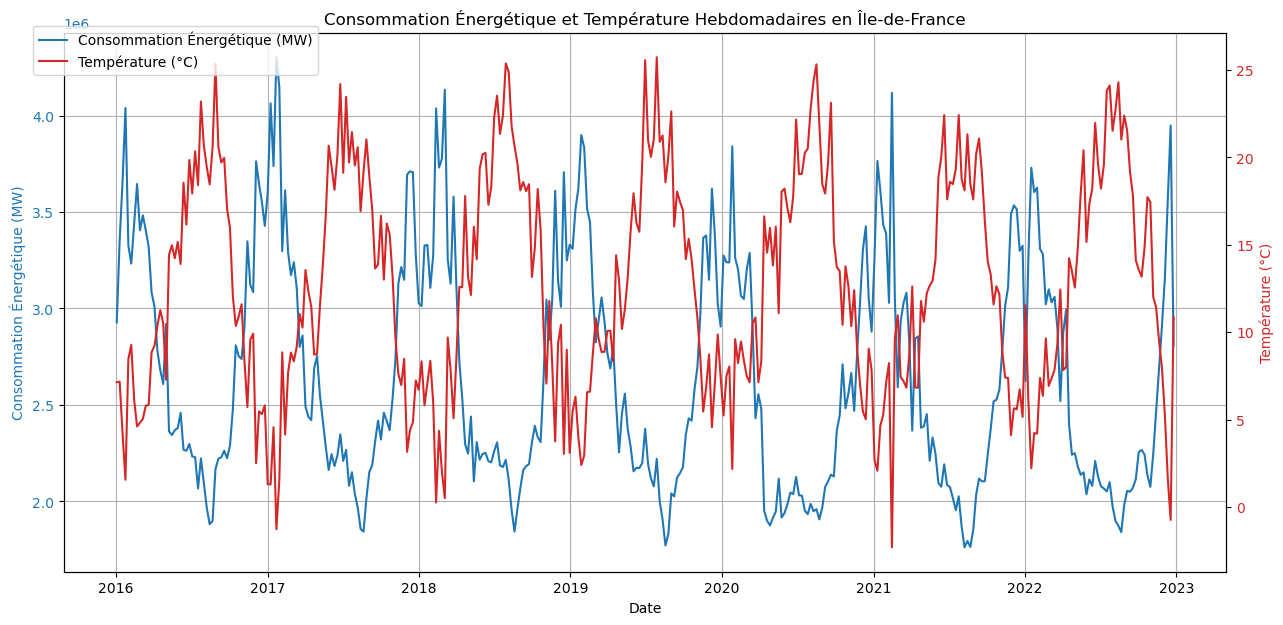

In [16]:
# Définir la fenêtre de date pour la visualisation
start_date = '2016-01-01'
end_date = '2022-12-31'

# Filtrer les données selon la fenêtre de date
filtered_weekly_consumption = weekly_idf_consumption.loc[start_date:end_date]
filtered_weekly_temp = weekly_idf_temp.loc[start_date:end_date]

# Créer une figure et un axe
fig, ax1 = plt.subplots(figsize=(15, 7))

# Tracer la consommation énergétique hebdomadaire
ax1.plot(filtered_weekly_consumption.index, filtered_weekly_consumption['conso_h'], color='tab:blue', label='Consommation Énergétique (MW)')
ax1.set_xlabel('Date')
ax1.set_ylabel('Consommation Énergétique (MW)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Créer un deuxième axe y
ax2 = ax1.twinx()
ax2.plot(filtered_weekly_temp.index, filtered_weekly_temp['tmoy'], color='tab:red', label='Température (°C)')
ax2.set_ylabel('Température (°C)', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Ajouter la légende et la grille
fig.legend(loc='upper left', bbox_to_anchor=(0.1,0.9))
ax1.grid(True)

# Ajouter un titre
plt.title('Consommation Énergétique et Température Hebdomadaires en Île-de-France')

# Afficher le graphique
plt.show()

**Calculons le taux de corrélation de la température et la consommation électrique**

In [17]:
# Fusionner les deux séries temporelles sur l'index (dates)
merged_data = pd.merge(filtered_weekly_consumption, filtered_weekly_temp, left_index=True, right_index=True)

# Calculer le coefficient de corrélation
correlation = merged_data['conso_h'].corr(merged_data['tmoy'])
print(f"Le coefficient de corrélation entre la consommation énergétique et la température est : {correlation:.2f}")

Le coefficient de corrélation entre la consommation énergétique et la température est : -0.91


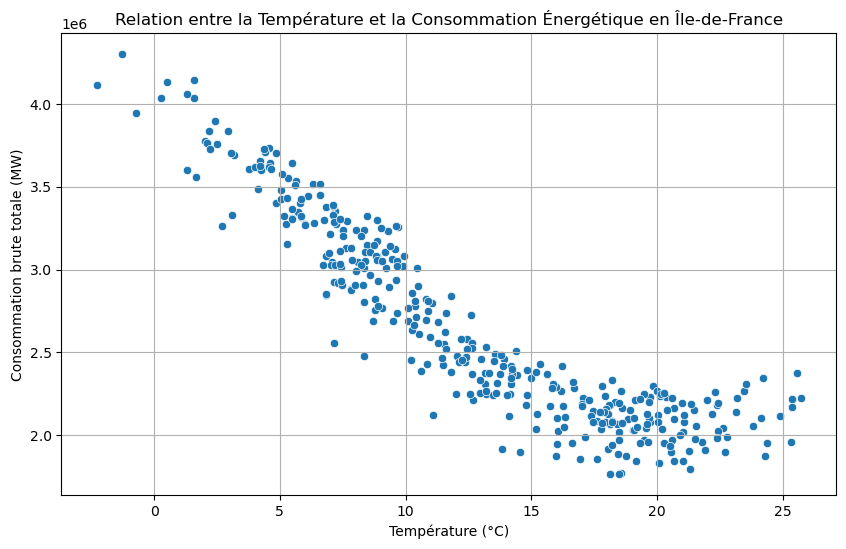

In [18]:
import seaborn as sns

# Créer un graphique de dispersion
plt.figure(figsize=(10, 6))
sns.scatterplot(x=merged_data['tmoy'], y=merged_data['conso_h'])
plt.xlabel('Température (°C)')
plt.ylabel('Consommation brute totale (MW)')
plt.title('Relation entre la Température et la Consommation Énergétique en Île-de-France')
plt.grid(True)
plt.show()

<Figure size 1000x600 with 0 Axes>

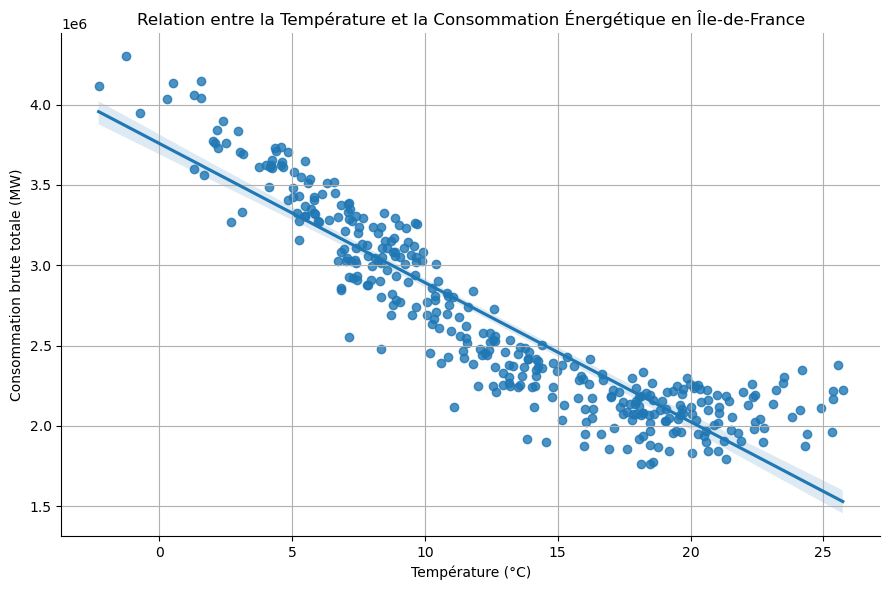

In [19]:
# Créer un graphique de dispersion avec une ligne de régression
plt.figure(figsize=(10, 6))
sns.lmplot(x='tmoy', y='conso_h', data=merged_data, aspect=1.5, height=6)
plt.xlabel('Température (°C)')
plt.ylabel('Consommation brute totale (MW)')
plt.title('Relation entre la Température et la Consommation Énergétique en Île-de-France')
plt.grid(True)
plt.tight_layout()  
plt.show()

**Enregistrement des csv**

In [20]:
# Enregistrer les données prétraitées pour Île-de-France
daily_idf_consumption.to_csv('daily_idf_consumption.csv')
weekly_idf_consumption.to_csv('weekly_idf_consumption.csv')
daily_idf_temp.to_csv('daily_idf_temp.csv')
weekly_idf_temp.to_csv('weekly_idf_temp.csv')

# Approximation par relation linéaire
On fait la supposition que la consommation d'énergie électrique est une fonction linéaire de la température.

Intercept: 3758701.712419638
Slope: -86680.61132204428


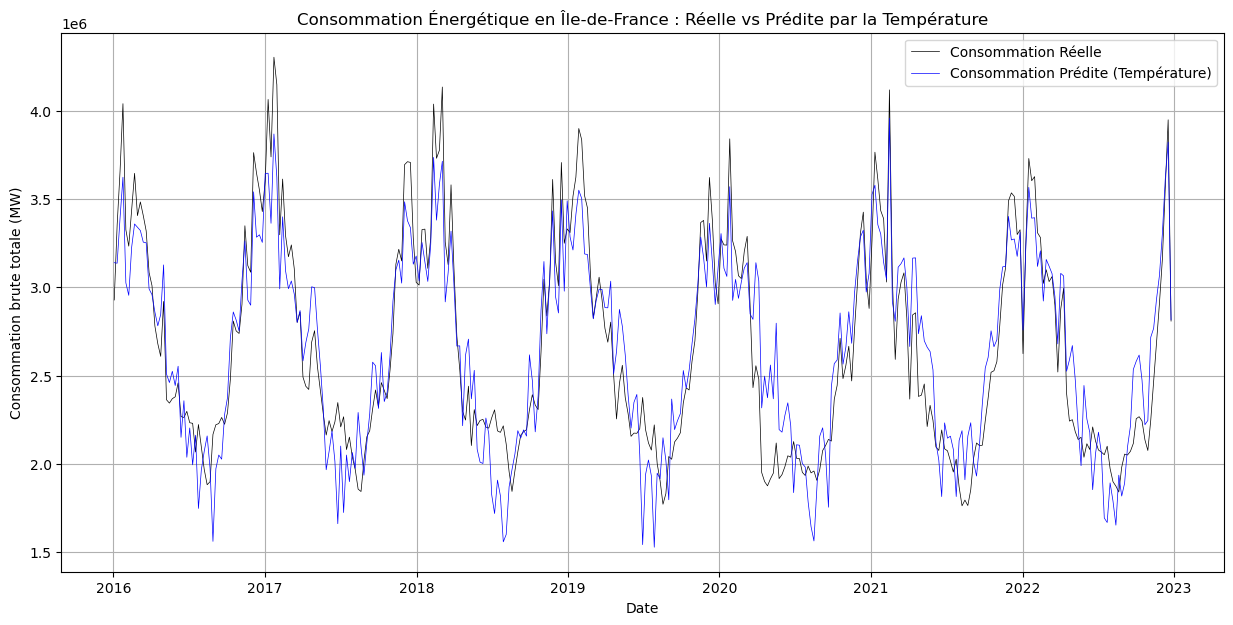

In [21]:
import statsmodels.api as sm

# Définir les variables dépendantes (y) et indépendantes (X)
X = merged_data['tmoy']
y = merged_data['conso_h']

# Ajouter une constante à X pour inclure l'interception dans le modèle
X = sm.add_constant(X)

# Ajuster le modèle de régression linéaire
model = sm.OLS(y, X).fit()

# Extraire les coefficients
intercept = model.params['const']
slope = model.params['tmoy']
print(f"Intercept: {intercept}")
print(f"Slope: {slope}")

# Prédire la consommation électrique
merged_data['Predicted_Consumption'] = intercept + slope * merged_data['tmoy']

# Tracer les données réelles et les données prédites
plt.figure(figsize=(15, 7))
plt.plot(merged_data.index, merged_data['conso_h'], label='Consommation Réelle', color='black', linewidth=0.5)
plt.plot(merged_data.index, merged_data['Predicted_Consumption'], label='Consommation Prédite (Température)', color='blue', linestyle='-', linewidth=0.5)
plt.xlabel('Date')
plt.ylabel('Consommation brute totale (MW)')
plt.title('Consommation Énergétique en Île-de-France : Réelle vs Prédite par la Température')
plt.legend()
plt.grid(True)
plt.show()

**Évaluation du modèle**

In [22]:
import numpy as np

# Fonctions pour calculer les erreurs
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [23]:
# Calculer les erreurs
y_true = merged_data['conso_h']
y_pred = merged_data['Predicted_Consumption']

error_mse = mse(y_true, y_pred)
error_mae = mae(y_true, y_pred)
error_mape = mape(y_true, y_pred)

print(f"MSE: {error_mse:.2f}")
print(f"MAE: {error_mae:.2f}")
print(f"MAPE: {error_mape:.2f}%")

MSE: 58428188114.49
MAE: 194533.88
MAPE: 7.80%


# Approximation par regression polynomiale

## Polynome de degré 2

Régression Polynômiale (Degré 2) - MSE: 32481233966.97
Régression Polynômiale (Degré 2) - MAE: 141191.93
Régression Polynômiale (Degré 2) - MAPE: 5.51%


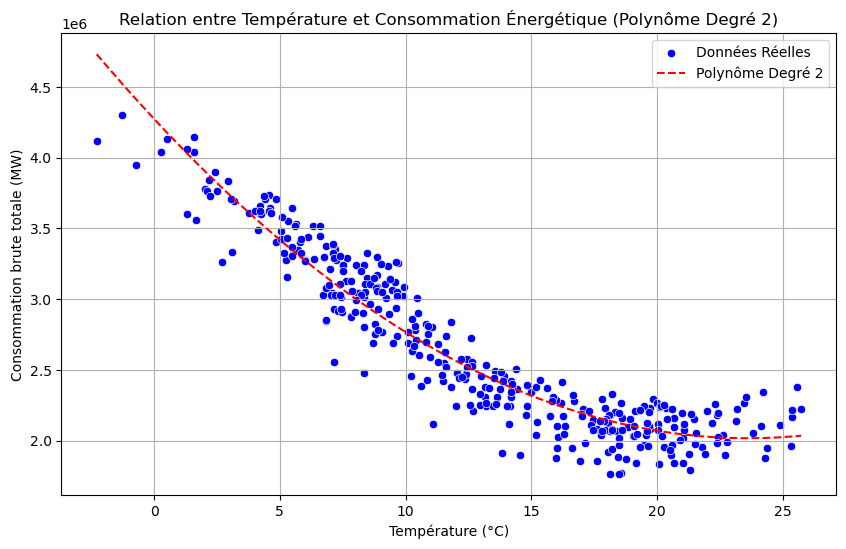

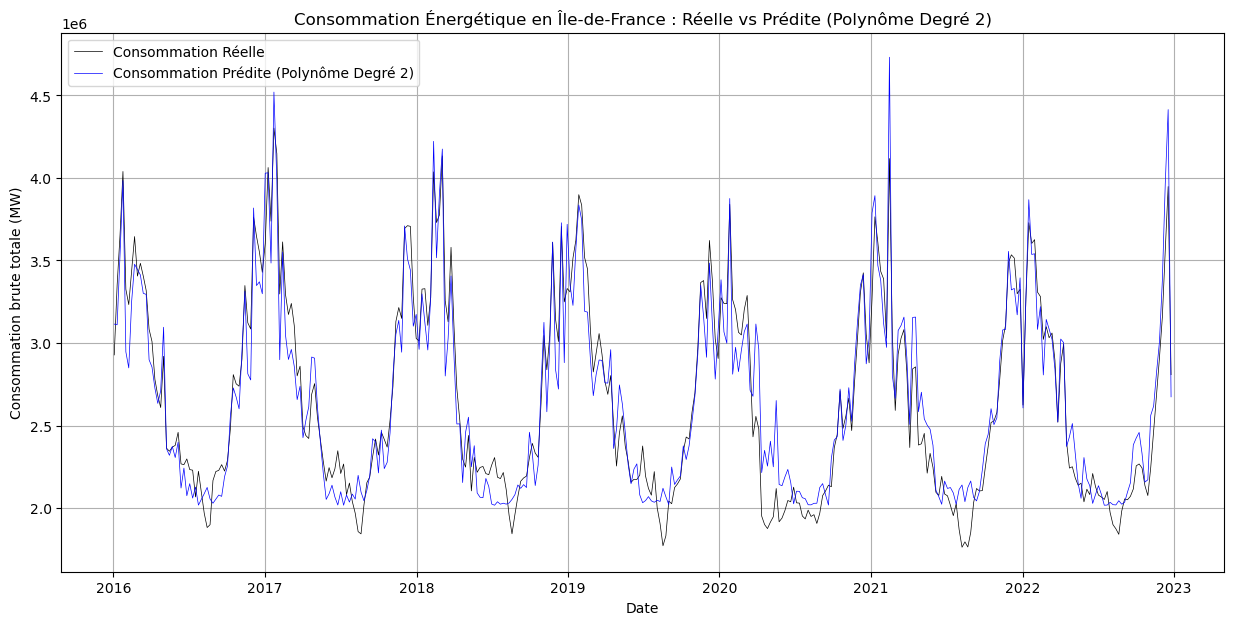

In [25]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Définir les variables dépendantes (y) et indépendantes (X)
X1 = merged_data['tmoy'].values.reshape(-1, 1)
y1 = merged_data['conso_h'].values

# Créer des caractéristiques polynomiales de degré 3
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X1)

# Ajuster le modèle de régression polynomiale
model_poly = LinearRegression().fit(X_poly, y1)

# Prédire la consommation électrique
y_pred_poly = model_poly.predict(X_poly)

# Calculer les erreurs
error_mse_poly = mean_squared_error(y1, y_pred_poly)
error_mae_poly = mean_absolute_error(y1, y_pred_poly)
error_mape_poly = np.mean(np.abs((y1 - y_pred_poly) / y1)) * 100

print(f"Régression Polynômiale (Degré 2) - MSE: {error_mse_poly:.2f}")
print(f"Régression Polynômiale (Degré 2) - MAE: {error_mae_poly:.2f}")
print(f"Régression Polynômiale (Degré 2) - MAPE: {error_mape_poly:.2f}%")

# Ajouter les prédictions au DataFrame
merged_data['Predicted_Consumption_Poly2'] = y_pred_poly

# Tracer la relation polynomiale (Degré 2) dans l'espace de corrélation
plt.figure(figsize=(10, 6))
sns.scatterplot(x=merged_data['tmoy'], y=merged_data['conso_h'], label='Données Réelles', color='blue')
sorted_indices = np.argsort(X1.flatten())
plt.plot(X1.flatten()[sorted_indices], y_pred_poly[sorted_indices], color='red', label='Polynôme Degré 2', linestyle='--')
plt.xlabel('Température (°C)')
plt.ylabel('Consommation brute totale (MW)')
plt.title('Relation entre Température et Consommation Énergétique (Polynôme Degré 2)')
plt.legend()
plt.grid(True)
plt.show()

# Tracer les données réelles et les données prédites
plt.figure(figsize=(15, 7))
plt.plot(merged_data.index, merged_data['conso_h'], label='Consommation Réelle', color='black', linewidth=0.5)
plt.plot(merged_data.index, merged_data['Predicted_Consumption_Poly2'], label='Consommation Prédite (Polynôme Degré 2)', color='blue', linewidth=0.5)
plt.xlabel('Date')
plt.ylabel('Consommation brute totale (MW)')
plt.title('Consommation Énergétique en Île-de-France : Réelle vs Prédite (Polynôme Degré 2)')
plt.legend()
plt.grid(True)
plt.show()


# Ajout de la temporalité
On remarque que la temporalité influence la consommation électrique (par exemple, avec un grand nombre de départ en vacances simultanément). On va donc ajouter cette variable.
On fait la supposition que la relation de temporalité est de type périodique, on utlisera donc une série de Fourier pour le modèle.

On essayera de trouver une relation tensorielle entre la température et la temporalité.

# Modèle GAM

## Modèle des fonctions à optimiser

In [34]:
import numpy as np
from scipy.interpolate import BSpline
from scipy.optimize import minimize
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import KFold


def generate_features(fourier_features, splines_features, temperature):
    X_interactions = np.column_stack([temperature.flatten() * fourier_features[:, i] for i in range(fourier_features.shape[1])])
    X = np.column_stack([temperature, fourier_features, splines_features, X_interactions])
    return X

def fit_and_predict(fourier_features, splines_features, temperature, y, y_mean, y_std, lam):
    X_interactions = np.column_stack([temperature.flatten() * fourier_features[:, i] for i in range(fourier_features.shape[1])])
    X = np.column_stack([temperature, fourier_features, splines_features, X_interactions])

    y_normalized = (y - y_mean) / y_std

    beta_init = np.zeros(X.shape[1])
    result = minimize(cost_function, beta_init, args=(X, y_normalized, lam), jac=gradient, method='BFGS')

    beta_opt = result.x

    y_pred_normalized = X @ beta_opt
    y_pred = y_pred_normalized * y_std + y_mean

    return y_pred, beta_opt

def fourier_terms_weeks(dates, num_terms):
    week_of_year = dates.apply(lambda x: x.isocalendar().week)
    terms = []
    for period in range(1, num_terms + 1):
        sin_term = np.sin(2 * np.pi * week_of_year / period)
        cos_term = np.cos(2 * np.pi * week_of_year / period)
        terms.append(sin_term)
        terms.append(cos_term)
    return np.vstack(terms).T

def predict_future(fourier_features_future, splines_features_future, temperature_future, beta_opt, y_mean, y_std):
    X_interactions_future = np.column_stack([temperature_future.flatten() * fourier_features_future[:, i] for i in range(fourier_features_future.shape[1])])
    X_future = np.column_stack([temperature_future, fourier_features_future, splines_features_future, X_interactions_future])

    y_pred_normalized_future = X_future @ beta_opt
    y_pred_future = y_pred_normalized_future * y_std + y_mean

    return y_pred_future

def evaluate_predictions(y_true, y_pred, label):
    error_mse = mean_squared_error(y_true, y_pred)
    error_mae = mean_absolute_error(y_true, y_pred)
    error_mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    print(f"{label} - MSE: {error_mse:.2f}")
    print(f"{label} - MAE: {error_mae:.2f}")
    print(f"{label} - MAPE: {error_mape:.2f}%")


**Spline cubiques**

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import BSpline
from scipy.optimize import minimize
from sklearn.metrics import mean_squared_error, mean_absolute_error
import statsmodels.api as sm


def cubic_splines(x, knots):
    n_knots = len(knots)
    splines = np.zeros((len(x), n_knots))
    for i in range(n_knots):
        c = np.zeros(n_knots)
        c[i] = 1
        splines[:, i] = BSpline(knots, c, 3)(x)
    return splines

# Créer des noeuds pour les splines cubiques
n_splines = 388
knots = np.linspace(merged_data.index.min().to_julian_date(), merged_data.index.max().to_julian_date(), n_splines)

# Générer les caractéristiques des splines cubiques
splines_features = cubic_splines(merged_data.index.to_julian_date().values, knots)

**Série de Fourier**

**Générer la matrice des caractéristiques**

In [36]:
# Fonction de coût (erreur quadratique moyenne + pénalité de régularisation)
def cost_function(beta, X, y, lam):
    predictions = X @ beta
    error = np.mean((y - predictions) ** 2)
    penalty = lam * np.sum(beta ** 2)
    return error + penalty

# Gradient de la fonction de coût
def gradient(beta, X, y, lam):
    predictions = X @ beta
    error_grad = -2 * X.T @ (y - predictions) / len(y)
    penalty_grad = 2 * lam * beta
    return error_grad + penalty_grad

In [37]:
temperature = merged_data['tmoy'].values.reshape(-1, 1)

# Génération des termes de Fourier
fourier_features_52 = fourier_terms_weeks(merged_data.index.to_series(), 52)
fourier_features_104 = fourier_terms_weeks(merged_data.index.to_series(), 104)
fourier_features_208 = fourier_terms_weeks(merged_data.index.to_series(), 208)

# Génération des matrices de caractéristiques
X_52 = generate_features(fourier_features_52, splines_features, temperature)
X_104 = generate_features(fourier_features_104, splines_features, temperature)
X_208 = generate_features(fourier_features_208, splines_features, temperature)

# Normalisation des données
y = merged_data['conso_h'].values
y_mean = y.mean()
y_std = y.std()
lam = 0.001  # Paramètre de régularisation


# Ajustement du modèle pour chaque configuration
y_pred_52, beta_opt_52 = fit_and_predict(fourier_features_52, splines_features, temperature, y, y_mean, y_std, lam)
y_pred_104, beta_opt_104 = fit_and_predict(fourier_features_104, splines_features, temperature, y, y_mean, y_std, lam)
y_pred_208, beta_opt_208 = fit_and_predict(fourier_features_208, splines_features, temperature, y, y_mean, y_std, lam)

# Stocker les prédictions dans le DataFrame
merged_data['Predicted_Consumption_52'] = y_pred_52
merged_data['Predicted_Consumption_104'] = y_pred_104
merged_data['Predicted_Consumption_208'] = y_pred_208

## Fonction Critères et Optimisation

**Critères des moindres carrés avec pénalité**

**Méthode de la descente du gradient**

52 Coefficients - MSE: 1820141721.49, MAE: 31853.54, MAPE: 1.22%
104 Coefficients - MSE: 1817421918.84, MAE: 31935.04, MAPE: 1.22%
208 Coefficients - MSE: 1816504723.89, MAE: 31975.38, MAPE: 1.22%


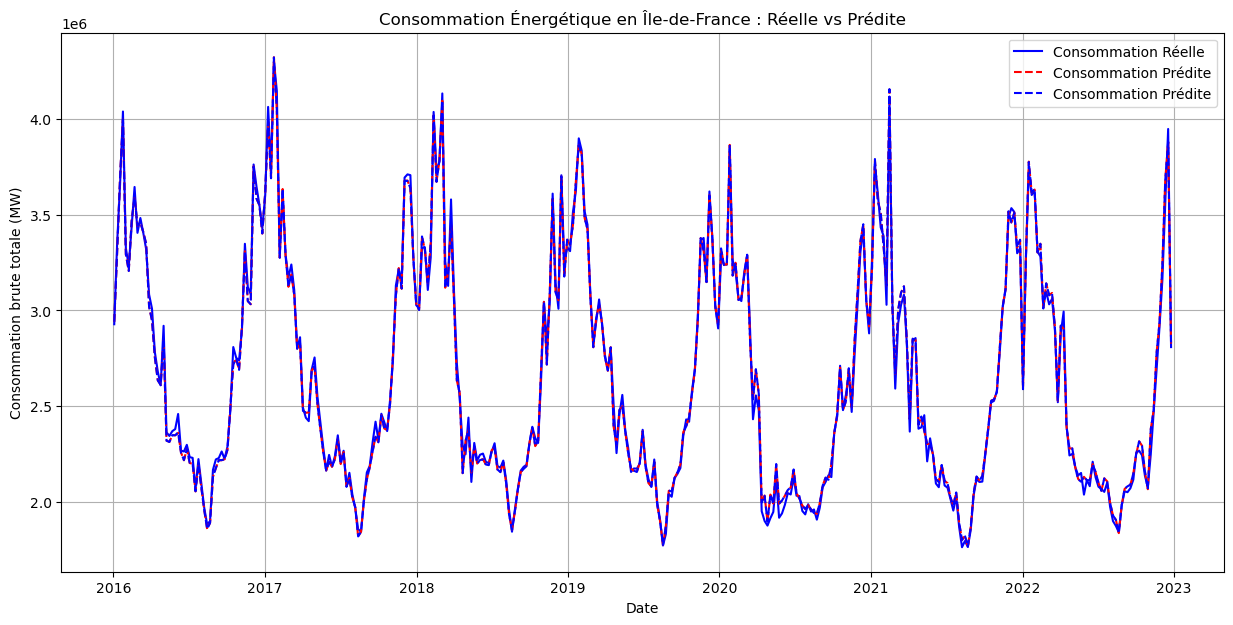

In [38]:
# Calculer les erreurs
error_mse_52 = mean_squared_error(y, y_pred_52)
error_mae_52 = mean_absolute_error(y, y_pred_52)
error_mape_52 = np.mean(np.abs((y - y_pred_52) / y)) * 100

error_mse_104 = mean_squared_error(y, y_pred_104)
error_mae_104 = mean_absolute_error(y, y_pred_104)
error_mape_104 = np.mean(np.abs((y - y_pred_104) / y)) * 100

error_mse_208 = mean_squared_error(y, y_pred_208)
error_mae_208 = mean_absolute_error(y, y_pred_208)
error_mape_208 = np.mean(np.abs((y - y_pred_208) / y)) * 100

print(f"52 Coefficients - MSE: {error_mse_52:.2f}, MAE: {error_mae_52:.2f}, MAPE: {error_mape_52:.2f}%")
print(f"104 Coefficients - MSE: {error_mse_104:.2f}, MAE: {error_mae_104:.2f}, MAPE: {error_mape_104:.2f}%")
print(f"208 Coefficients - MSE: {error_mse_208:.2f}, MAE: {error_mae_208:.2f}, MAPE: {error_mape_208:.2f}%")


# Tracer les données réelles et les données prédites
plt.figure(figsize=(15, 7))
plt.plot(merged_data.index, merged_data['conso_h'], label='Consommation Réelle', color='blue')
plt.plot(merged_data.index, merged_data['Predicted_Consumption_52'], label='Consommation Prédite', color='red', linestyle='--')
plt.plot(merged_data.index, merged_data['Predicted_Consumption_104'], label='Consommation Prédite', color='blue', linestyle='--')

plt.xlabel('Date')
plt.ylabel('Consommation brute totale (MW)')
plt.title('Consommation Énergétique en Île-de-France : Réelle vs Prédite')
plt.legend()
plt.grid(True)
plt.show()

# Partie anticipation du futur
On suppose la température et la temporalité connue pour l'année à prévoir.

## Chargement des données de 2023 à 2024

In [39]:
# Définir la fenêtre de date pour la visualisation
start_date1 = '2023-01-01'
end_date1 = '2023-12-31'
weekly_temperature_2023 = weekly_idf_temp.loc[start_date1:end_date1]
temperature_2023 = weekly_temperature_2023['tmoy'].values.reshape(-1, 1)

## Générer les séries de Fourier et Splines

In [40]:
# Générer les splines cubiques pour l'année 2023 en limitant l'extrapolation
def cubic_splines_limited(x, knots):
    n_knots = len(knots)
    splines = np.zeros((len(x), n_knots))
    for i in range(n_knots):
        c = np.zeros(n_knots)
        c[i] = 1
        bspline = BSpline(knots, c, 3)
        splines[:, i] = np.clip(bspline(x), -10, 10)  # Limiter les valeurs des splines
    return splines

# Générer les splines cubiques limitées pour l'année 2023
splines_features_2023 = cubic_splines_limited(weekly_temperature_2023.index.to_julian_date().values, knots)


# Génération des termes de Fourier pour l'année 2023
fourier_features_2023_52 = fourier_terms_weeks(weekly_temperature_2023.index.to_series(), 52)
fourier_features_2023_104 = fourier_terms_weeks(weekly_temperature_2023.index.to_series(), 104)
fourier_features_2023_208 = fourier_terms_weeks(weekly_temperature_2023.index.to_series(), 208)

# Prédictions pour 2023 avec chaque configuration
y_pred_2023_52 = predict_future(fourier_features_2023_52, splines_features_2023, temperature_2023, beta_opt_52, y_mean, y_std)
y_pred_2023_104 = predict_future(fourier_features_2023_104, splines_features_2023, temperature_2023, beta_opt_104, y_mean, y_std)
y_pred_2023_208 = predict_future(fourier_features_2023_208, splines_features_2023, temperature_2023, beta_opt_208, y_mean, y_std)


## Affichage

52 Coefficients - MSE: 10021678772.02
52 Coefficients - MAE: 72883.81
52 Coefficients - MAPE: 2.86%
104 Coefficients - MSE: 12947281124.65
104 Coefficients - MAE: 85954.75
104 Coefficients - MAPE: 3.41%
208 Coefficients - MSE: 13385891373.97
208 Coefficients - MAE: 87962.46
208 Coefficients - MAPE: 3.49%


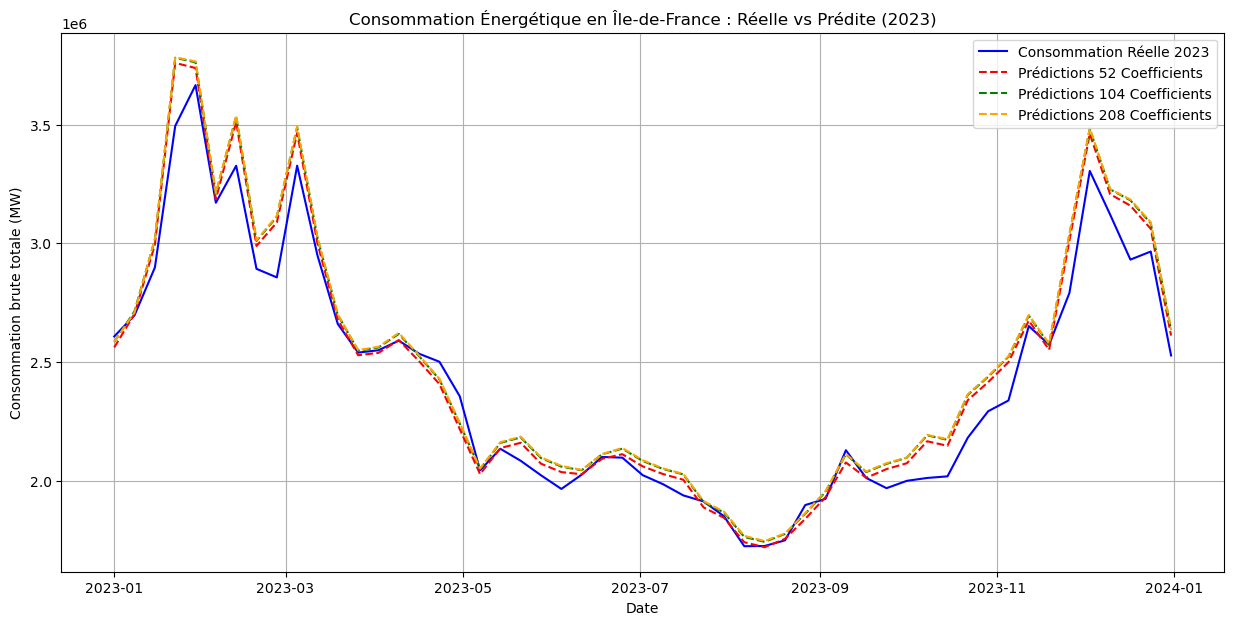

In [41]:
weekly_consumption_2023 = weekly_idf_consumption.loc[start_date1:end_date1]



# Évaluer les prédictions pour chaque configuration
evaluate_predictions(weekly_consumption_2023['conso_h'], y_pred_2023_52, "52 Coefficients")
evaluate_predictions(weekly_consumption_2023['conso_h'], y_pred_2023_104, "104 Coefficients")
evaluate_predictions(weekly_consumption_2023['conso_h'], y_pred_2023_208, "208 Coefficients")

# Tracer les données réelles et les prédictions
plt.figure(figsize=(15, 7))
plt.plot(weekly_consumption_2023.index, weekly_consumption_2023['conso_h'], label='Consommation Réelle 2023', color='blue')
plt.plot(weekly_consumption_2023.index, y_pred_2023_52, label='Prédictions 52 Coefficients', color='red', linestyle='--')
plt.plot(weekly_consumption_2023.index, y_pred_2023_104, label='Prédictions 104 Coefficients', color='green', linestyle='--')
plt.plot(weekly_consumption_2023.index, y_pred_2023_208, label='Prédictions 208 Coefficients', color='orange', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Consommation brute totale (MW)')
plt.title('Consommation Énergétique en Île-de-France : Réelle vs Prédite (2023)')
plt.legend()
plt.grid(True)
plt.show()

# Validation croisée

In [42]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Fonction de validation croisée
def cross_validation(X, y, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=1)
    mse_scores = []
    mae_scores = []
    mape_scores = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        y_mean = y_train.mean()
        y_std = y_train.std()
        y_train_normalized = (y_train - y_mean) / y_std

        beta_init = np.zeros(X_train.shape[1])
        lam = 0.001  # Paramètre de régularisation

        result = minimize(cost_function, beta_init, args=(X_train, y_train_normalized, lam), jac=gradient, method='BFGS')
        beta_opt = result.x

        y_pred_normalized = X_test @ beta_opt
        y_pred = y_pred_normalized * y_std + y_mean

        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

        mse_scores.append(mse)
        mae_scores.append(mae)
        mape_scores.append(mape)

    return np.mean(mse_scores), np.mean(mae_scores), np.mean(mape_scores)

# Appliquer la validation croisée
mse_52, mae_52, mape_52 = cross_validation(X_52, y)
mse_104, mae_104, mape_104 = cross_validation(X_104, y)
mse_208, mae_208, mape_208 = cross_validation(X_208, y)

print(f"52 Coefficients - Validation croisée MSE: {mse_52:.2f}, MAE: {mae_52:.2f}, MAPE: {mape_52:.2f}%")
print(f"104 Coefficients - Validation croisée MSE: {mse_104:.2f}, MAE: {mae_104:.2f}, MAPE: {mape_104:.2f}%")
print(f"208 Coefficients - Validation croisée MSE: {mse_208:.2f}, MAE: {mae_208:.2f}, MAPE: {mape_208:.2f}%")

52 Coefficients - Validation croisée MSE: 15410234069.42, MAE: 84567.52, MAPE: 3.19%
104 Coefficients - Validation croisée MSE: 15338680921.07, MAE: 84822.26, MAPE: 3.20%
208 Coefficients - Validation croisée MSE: 15327229676.80, MAE: 84928.21, MAPE: 3.20%


# Analyse des résidus

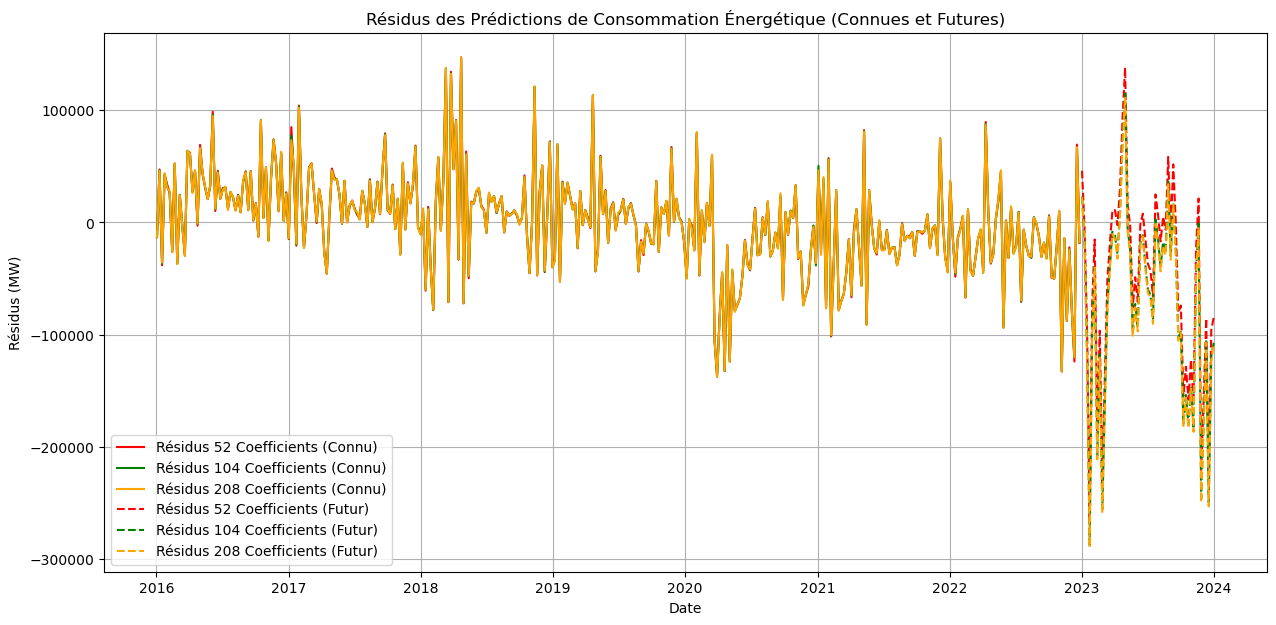

In [43]:
# Calcul des résidus pour les trois configurations
residuals_52 = y - y_pred_52
residuals_104 = y - y_pred_104
residuals_208 = y - y_pred_208

# Calcul des résidus pour les prédictions futures
residuals_2023_52 = weekly_consumption_2023['conso_h'].values - y_pred_2023_52
residuals_2023_104 = weekly_consumption_2023['conso_h'].values - y_pred_2023_104
residuals_2023_208 = weekly_consumption_2023['conso_h'].values - y_pred_2023_208

# Créer un DataFrame pour les données de 2023
future_data_2023 = pd.DataFrame({
    'Date': weekly_consumption_2023.index,
    'Residuals_2023_52': residuals_2023_52,
    'Residuals_2023_104': residuals_2023_104,
    'Residuals_2023_208': residuals_2023_208
})


# Stocker les résidus dans le DataFrame
merged_data['Residuals_52'] = residuals_52
merged_data['Residuals_104'] = residuals_104
merged_data['Residuals_208'] = residuals_208

# Tracer les résidus pour les données connues et futures
plt.figure(figsize=(15, 7))
plt.plot(merged_data.index, merged_data['Residuals_52'], label='Résidus 52 Coefficients (Connu)', color='red')
plt.plot(merged_data.index, merged_data['Residuals_104'], label='Résidus 104 Coefficients (Connu)', color='green')
plt.plot(merged_data.index, merged_data['Residuals_208'], label='Résidus 208 Coefficients (Connu)', color='orange')
plt.plot(future_data_2023['Date'], future_data_2023['Residuals_2023_52'], label='Résidus 52 Coefficients (Futur)', color='red', linestyle='--')
plt.plot(future_data_2023['Date'], future_data_2023['Residuals_2023_104'], label='Résidus 104 Coefficients (Futur)', color='green', linestyle='--')
plt.plot(future_data_2023['Date'], future_data_2023['Residuals_2023_208'], label='Résidus 208 Coefficients (Futur)', color='orange', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Résidus (MW)')
plt.title('Résidus des Prédictions de Consommation Énergétique (Connues et Futures)')
plt.legend()
plt.grid(True)
plt.show()